# Importing

In [1]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

ModuleNotFoundError: No module named 'wordcloud'

# Data Outline

In [ ]:
data = pd.read_csv("C:\Capstone project(8th sem)\MindSight\Dataset\data.csv", delimiter='\t')



data.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

print(data.shape)

(6982, 2)


In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.isnull().sum()

text     10
label     2
dtype: int64

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data=data.dropna(how='any')

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data['label'].value_counts()

0.0    6240
1.0     730
Name: label, dtype: int64

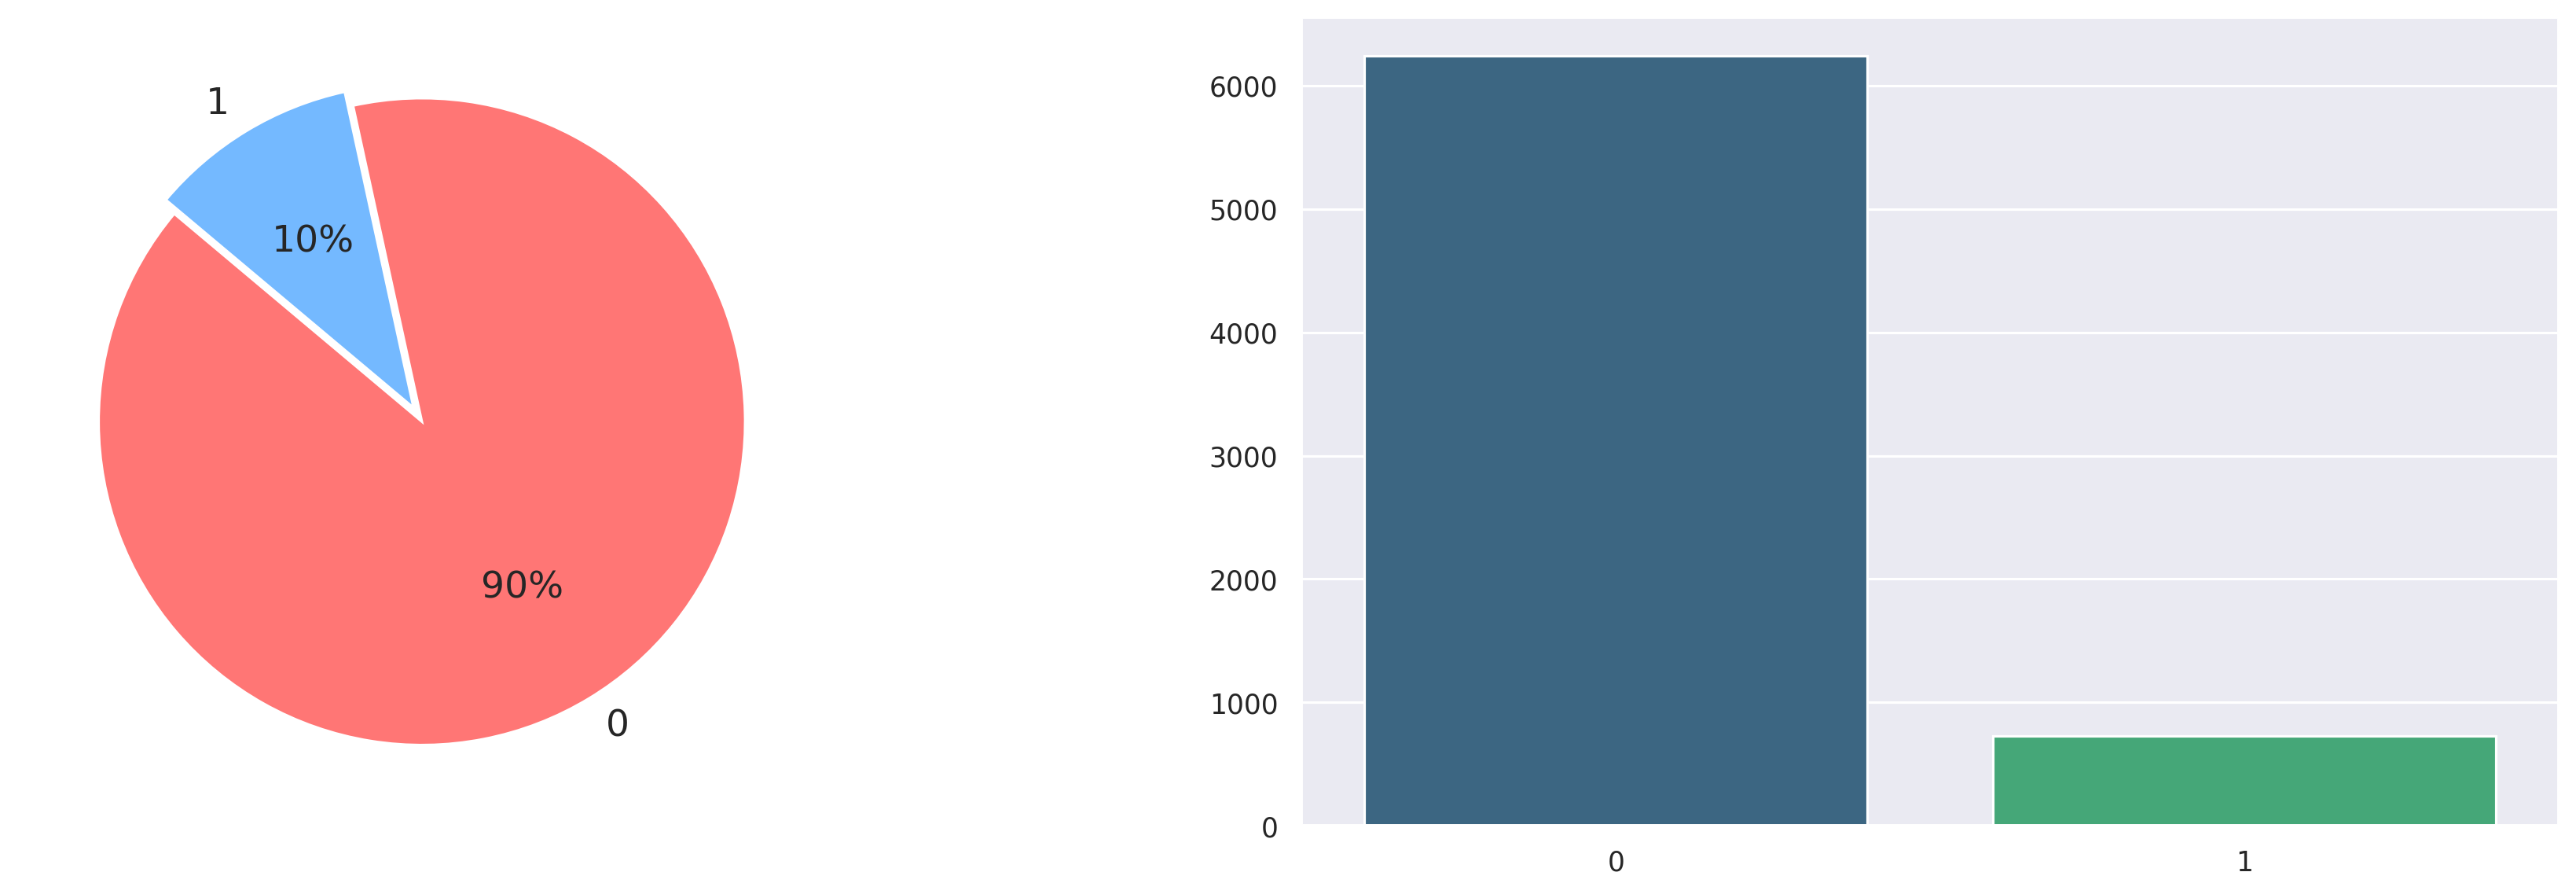

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

# Features Engineering

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data['Total Words'] = data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["text"].apply(count_total_words)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


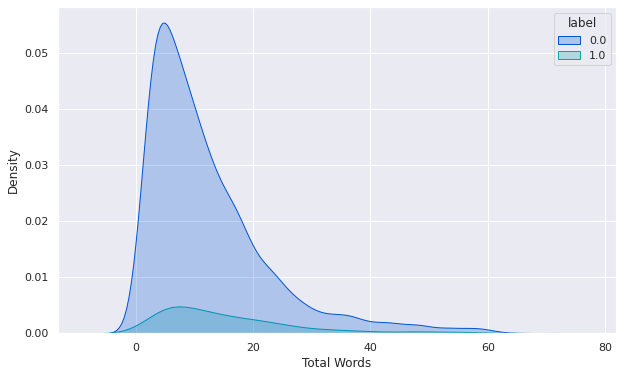

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

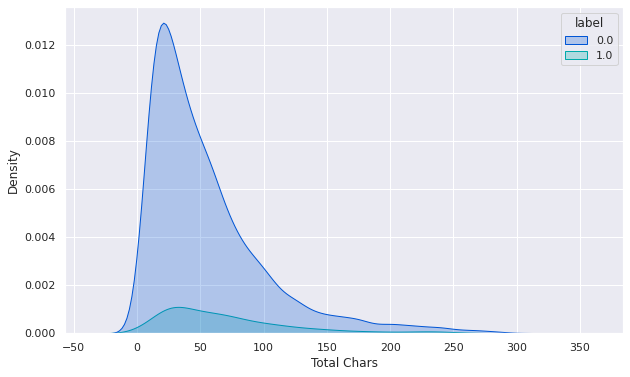

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Chars'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

# Text Preprocessing

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def convert_lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(convert_lowercase)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['text'] = data['text'].apply(remove_url)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text'] = data['text'].apply(remove_punc)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['text'] = data['text'].apply(perform_stemming)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data['Total Words After Transformation'] = data['text'].apply(lambda x: np.log(len(x.split())))

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.head()

,text,label,Total Words,Total Chars,Total Words After Transformation
0,oh gosh,1.0,3,8,0.693147
1,troubl sleep confus mind restless heart tune,1.0,10,55,1.945910
2,wrong back dear forward doubt stay restless re...,1.0,14,65,2.197225
3,ive shift focu someth els im still worri,1.0,11,51,2.079442
4,im restless restless month boy mean,1.0,14,59,1.791759


# Visualization

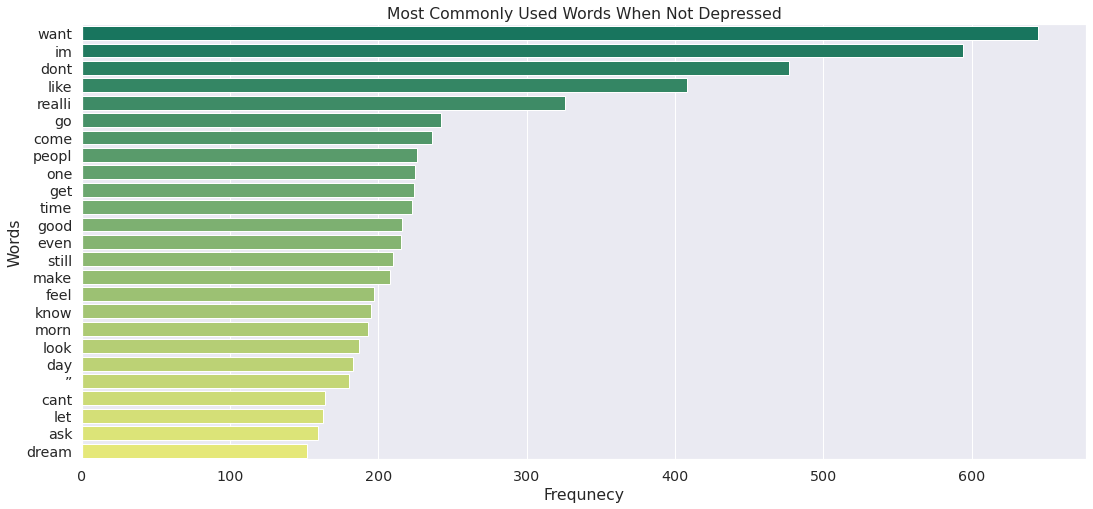

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

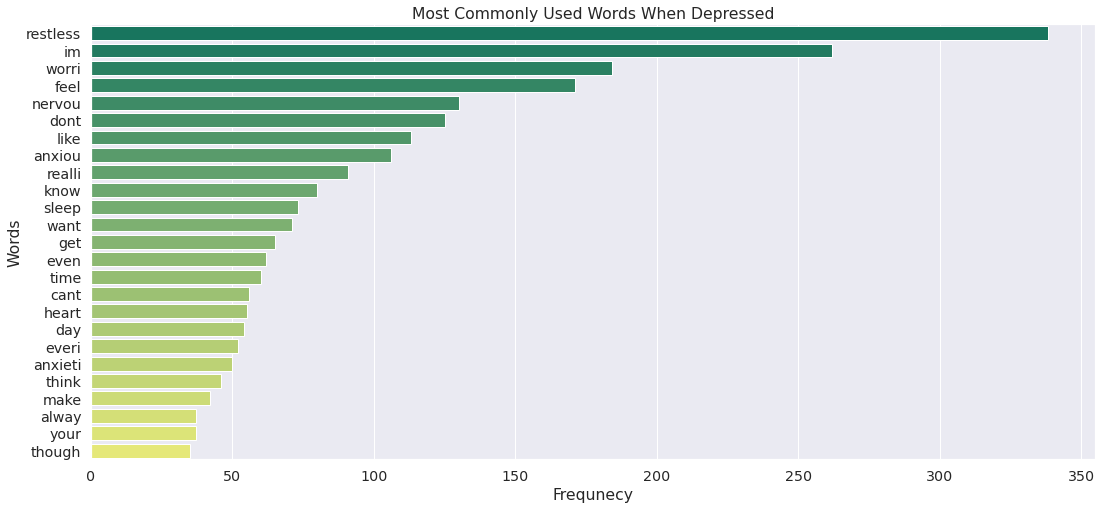

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_dep_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

# Vectorization

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

# Modeling

In [ ]:
# ✅ Import required libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# ✅ Assuming X_train, X_test, y_train, y_test are already defined in your notebook

# ✅ SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\n✅ SVM Accuracy:", round(accuracy_score(y_test, svm_pred) * 100, 2), "%")
print(classification_report(y_test, svm_pred))
joblib.dump(svm_model, 'svm_model.pkl')

# ✅ Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\n✅ Decision Tree Accuracy:", round(accuracy_score(y_test, dt_pred) * 100, 2), "%")
print(classification_report(y_test, dt_pred))
joblib.dump(dt_model, 'decision_tree_model.pkl')

# ✅ K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("\n✅ KNN Accuracy:", round(accuracy_score(y_test, knn_pred) * 100, 2), "%")
print(classification_report(y_test, knn_pred))
joblib.dump(knn_model, 'knn_model.pkl')

print("\n✅ Models saved as 'svm_model.pkl', 'decision_tree_model.pkl', 'knn_model.pkl'")



✅ SVM Accuracy: 97.92 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.99      0.81      0.89       146

    accuracy                           0.98      1394
   macro avg       0.98      0.90      0.94      1394
weighted avg       0.98      0.98      0.98      1394


✅ Decision Tree Accuracy: 99.14 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1248
         1.0       0.98      0.94      0.96       146

    accuracy                           0.99      1394
   macro avg       0.99      0.97      0.98      1394
weighted avg       0.99      0.99      0.99      1394


✅ KNN Accuracy: 92.61 %
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1248
         1.0       0.94      0.32      0.47       146

    accuracy                           0.93      1394
   macro avg       0.93      0.66      0.72

In [ ]:
# ✅ Import required libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# ✅ Assuming X_train, X_test, y_train, y_test are already defined

# ✅ SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\n✅ SVM Accuracy:", round(accuracy_score(y_test, svm_pred) * 100, 2), "%")
print(classification_report(y_test, svm_pred))
joblib.dump(svm_model, 'svm_model.pkl')

# ✅ Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\n✅ Decision Tree Accuracy:", round(accuracy_score(y_test, dt_pred) * 100, 2), "%")
print(classification_report(y_test, dt_pred))
joblib.dump(dt_model, 'decision_tree_model.pkl')

# ✅ K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("\n✅ KNN Accuracy:", round(accuracy_score(y_test, knn_pred) * 100, 2), "%")
print(classification_report(y_test, knn_pred))
joblib.dump(knn_model, 'knn_model.pkl')

# ✅ Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\n✅ Naive Bayes Accuracy:", round(accuracy_score(y_test, nb_pred) * 100, 2), "%")
print(classification_report(y_test, nb_pred))
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# ✅ Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\n✅ Random Forest Accuracy:", round(accuracy_score(y_test, rf_pred) * 100, 2), "%")
print(classification_report(y_test, rf_pred))
joblib.dump(rf_model, 'random_forest_model.pkl')

print("\n✅ All models saved: svm_model.pkl, decision_tree_model.pkl, knn_model.pkl, naive_bayes_model.pkl, random_forest_model.pkl")



✅ SVM Accuracy: 97.92 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.99      0.81      0.89       146

    accuracy                           0.98      1394
   macro avg       0.98      0.90      0.94      1394
weighted avg       0.98      0.98      0.98      1394


✅ Decision Tree Accuracy: 99.14 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1248
         1.0       0.98      0.94      0.96       146

    accuracy                           0.99      1394
   macro avg       0.99      0.97      0.98      1394
weighted avg       0.99      0.99      0.99      1394


✅ KNN Accuracy: 92.61 %
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1248
         1.0       0.94      0.32      0.47       146

    accuracy                           0.93      1394
   macro avg       0.93      0.66      0.72

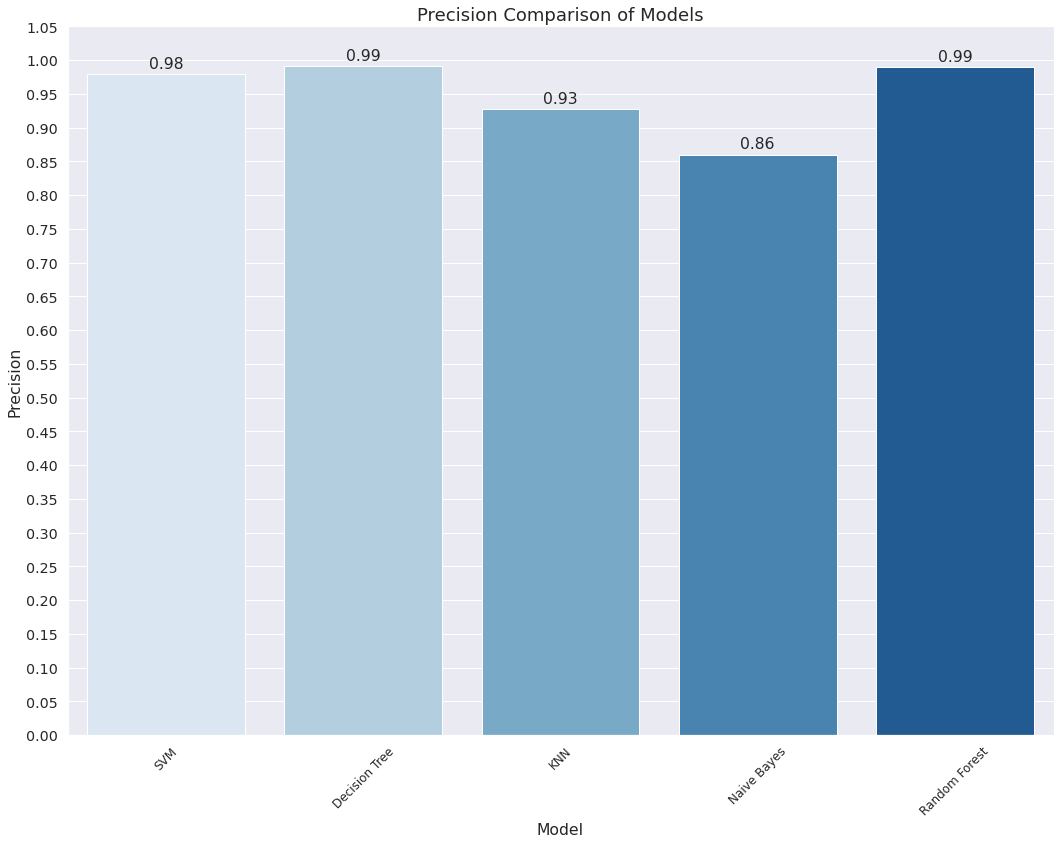

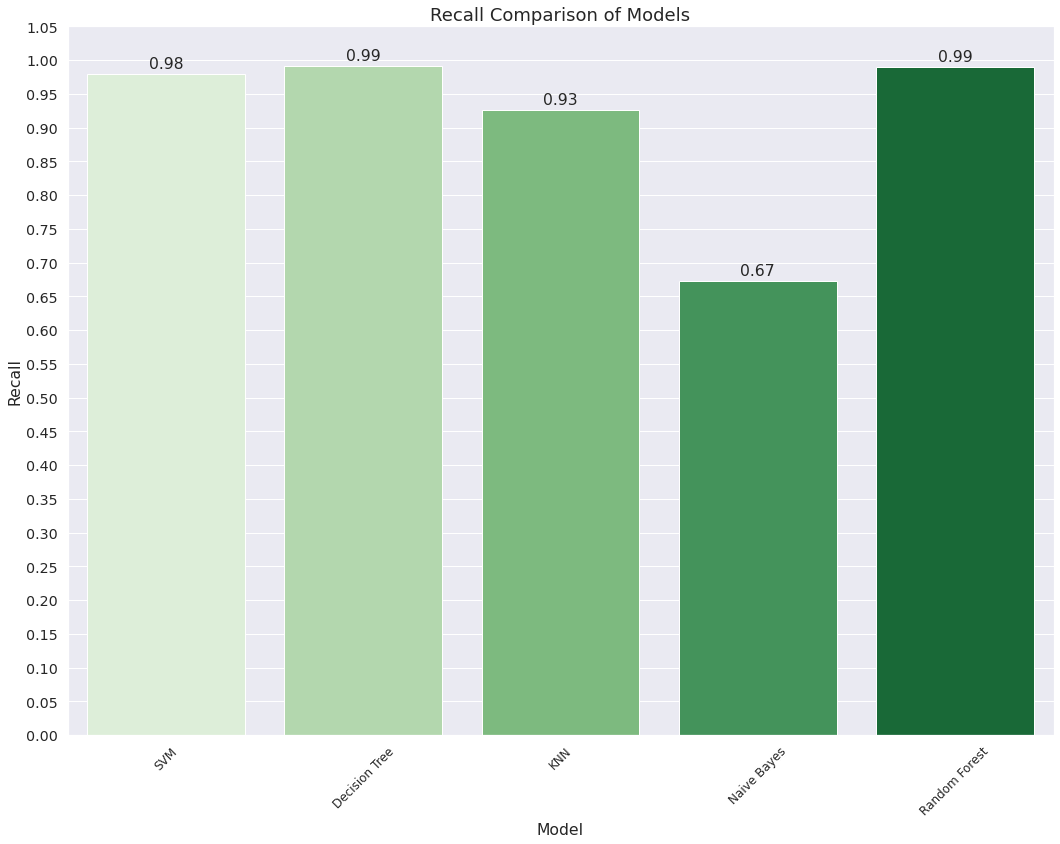

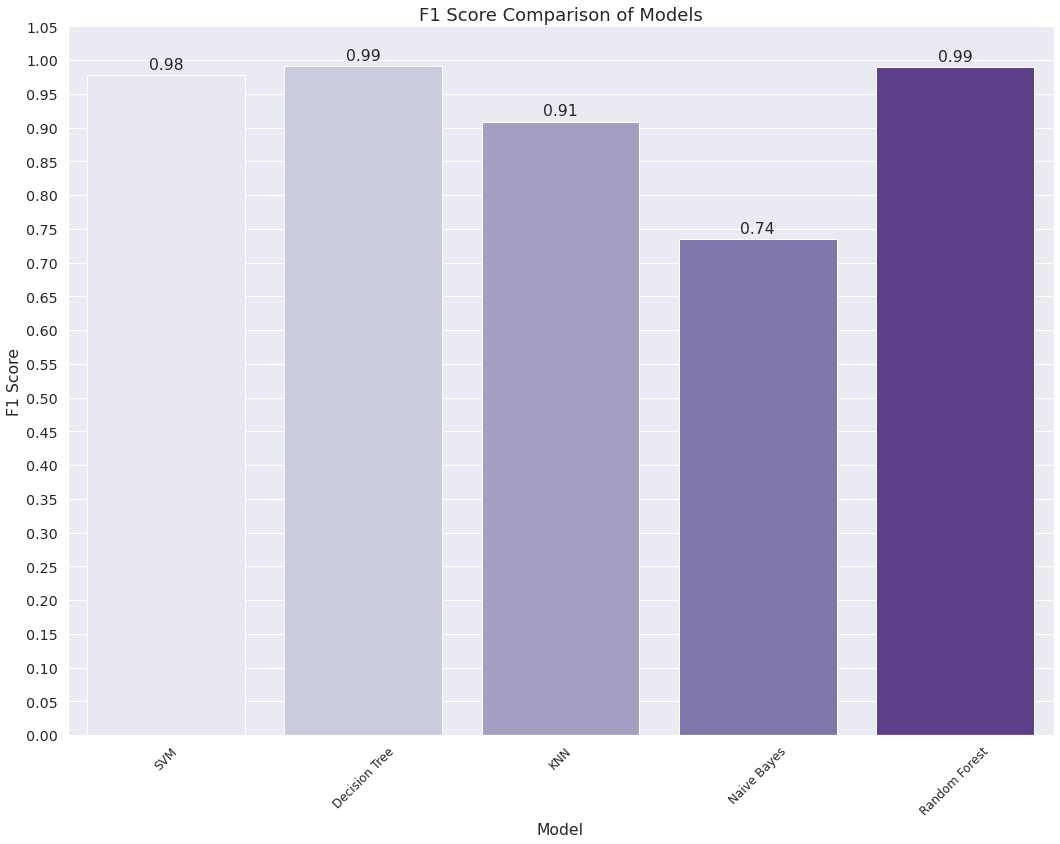

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Precision Plot - Taller and thinner
plt.figure(figsize=(15, 12))  # Taller figure for higher bar appearance
ax = sns.barplot(x='Model', y='Precision', data=results_df, palette='Blues')
plt.title('Precision Comparison of Models', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.05))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()

# ✅ Recall Plot
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='Model', y='Recall', data=results_df, palette='Greens')
plt.title('Recall Comparison of Models', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.05))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()

# ✅ F1 Score Plot
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Purples')
plt.title('F1 Score Comparison of Models', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.05))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# ✅ Example: Save each trained model
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']